# SSA

In [54]:
# imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

## Temperature

In [86]:
# read in the data
data = pd.read_csv('Datasets/calcofi_combined_temp.csv')
data

,Cst_Cnt,Sta_ID,ChlorA,Phaeop,T_degC,Salnty,O2ml_L,PO4uM,SiO3uM,NO3uM,...,Month,Julian_Day,Lat_Dec,Lon_Dec,Julian_Date,Wind_Spd,Wave_Ht,Dry_T,Wave_Prd,Barometer
0,1,054.0 056.0,NaN,NaN,8.414828,33.770571,NaN,NaN,NaN,NaN,...,3,60,38.833333,-124.083333,17958.0,18.0,NaN,NaN,NaN,NaN
1,2,052.0 075.0,NaN,NaN,6.612188,33.811156,NaN,NaN,NaN,NaN,...,3,60,38.583333,-125.800000,17958.0,5.0,NaN,NaN,NaN,NaN
2,3,051.0 085.0,NaN,NaN,7.291935,33.505419,NaN,NaN,NaN,NaN,...,3,61,38.475000,-126.666666,17959.0,5.0,NaN,NaN,NaN,NaN
3,4,050.0 095.0,NaN,NaN,7.437742,33.563267,NaN,NaN,NaN,NaN,...,3,61,38.333333,-127.516666,17959.0,8.0,NaN,NaN,NaN,NaN
4,5,050.0 104.0,NaN,NaN,8.095385,33.438200,NaN,NaN,NaN,NaN,...,3,61,38.233333,-128.366666,17959.0,13.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35384,35640,093.3 060.0,0.441000,0.272333,10.189478,26.013475,3.393522,1.753478,27.994783,21.642174,...,5,125,31.846300,-119.565900,44321.0,3.0,2.0,14.2,8.0,1015.8
35385,35641,093.3 070.0,0.296533,0.130800,10.864045,25.739976,3.831318,1.485909,23.364091,17.431364,...,5,126,31.515130,-120.240520,44322.0,7.0,NaN,13.6,NaN,1015.4
35386,35642,093.3 080.0,0.214667,0.107533,10.590261,25.814580,3.374952,1.610000,27.298182,19.575000,...,5,126,31.176820,-120.920900,44322.0,6.0,NaN,12.7,NaN,1016.9
35387,35643,093.3 090.0,0.235235,0.112588,10.446458,25.826096,3.724625,1.532917,26.943333,18.801250,...,5,126,30.846380,-121.589030,44322.0,7.0,3.0,13.1,8.0,1017.6


In [97]:
data['Sta_ID'] = data['Sta_ID'].str.split().str[0]
data

,Cst_Cnt,Sta_ID,ChlorA,Phaeop,T_degC,Salnty,O2ml_L,PO4uM,SiO3uM,NO3uM,...,Month,Julian_Day,Lat_Dec,Lon_Dec,Julian_Date,Wind_Spd,Wave_Ht,Dry_T,Wave_Prd,Barometer
0,1,054.0,NaN,NaN,8.414828,33.770571,NaN,NaN,NaN,NaN,...,3,60,38.833333,-124.083333,17958.0,18.0,NaN,NaN,NaN,NaN
1,2,052.0,NaN,NaN,6.612188,33.811156,NaN,NaN,NaN,NaN,...,3,60,38.583333,-125.800000,17958.0,5.0,NaN,NaN,NaN,NaN
2,3,051.0,NaN,NaN,7.291935,33.505419,NaN,NaN,NaN,NaN,...,3,61,38.475000,-126.666666,17959.0,5.0,NaN,NaN,NaN,NaN
3,4,050.0,NaN,NaN,7.437742,33.563267,NaN,NaN,NaN,NaN,...,3,61,38.333333,-127.516666,17959.0,8.0,NaN,NaN,NaN,NaN
4,5,050.0,NaN,NaN,8.095385,33.438200,NaN,NaN,NaN,NaN,...,3,61,38.233333,-128.366666,17959.0,13.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35384,35640,093.3,0.441000,0.272333,10.189478,26.013475,3.393522,1.753478,27.994783,21.642174,...,5,125,31.846300,-119.565900,44321.0,3.0,2.0,14.2,8.0,1015.8
35385,35641,093.3,0.296533,0.130800,10.864045,25.739976,3.831318,1.485909,23.364091,17.431364,...,5,126,31.515130,-120.240520,44322.0,7.0,NaN,13.6,NaN,1015.4
35386,35642,093.3,0.214667,0.107533,10.590261,25.814580,3.374952,1.610000,27.298182,19.575000,...,5,126,31.176820,-120.920900,44322.0,6.0,NaN,12.7,NaN,1016.9
35387,35643,093.3,0.235235,0.112588,10.446458,25.826096,3.724625,1.532917,26.943333,18.801250,...,5,126,30.846380,-121.589030,44322.0,7.0,3.0,13.1,8.0,1017.6


In [98]:
# sort the data
data_sorted = data.sort_values(by=['Julian_Date'], ascending = True)

# Check the sorted data
data_sorted[['Sta_ID', 'Julian_Date', 'T_degC']]

,Sta_ID,Julian_Date,T_degC
27,092.0,17957.0,9.122188
0,054.0,17958.0,8.414828
30,092.0,17958.0,8.997188
28,092.0,17958.0,10.742083
29,092.0,17958.0,8.352187
...,...,...,...
35355,083.3,44329.0,12.887538
35354,083.3,44329.0,12.847083
35356,083.3,44329.0,10.221739
35353,083.3,44329.0,15.534375


In [99]:
# data_chla = data_sorted.pivot_table(index='Julian_Date', columns='Sta_ID', values='ChlorA')
data_chla = data_sorted.pivot_table(index='Julian_Date', columns='Sta_ID', values='T_degC')
data_chla.head()

Sta_ID,001.0,002.0,004.0,005.0,006.0,006.7,008.0,009.0,009.5,010.0,...,160.0,160.7,163.3,165.0,166.7,170.0,170.5,171.0,173.3,176.7
Julian_Date,,,,,,,,,,,,,,,,,,,,,
17957.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17958.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17959.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17960.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17961.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
# Filter columns that have more than 150 non-null values
filtered_data = data_chla.loc[:, data_chla.notnull().sum(axis=0) > 1100]
filtered_data

Sta_ID,090.0
Julian_Date,
17957.0,NaN
17958.0,NaN
17959.0,NaN
17960.0,NaN
17961.0,NaN
...,...
44325.0,12.496497
44326.0,NaN
44327.0,NaN


In [115]:
# normalize the data
filtered_data = (filtered_data - np.mean(filtered_data))/np.std(filtered_data)
filtered_data.head()

/Users/andreajackman/miniconda3/envs/eosc410/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Sta_ID,090.0
Julian_Date,
17957.0,NaN
17958.0,NaN
17959.0,NaN
17960.0,NaN
17961.0,NaN


(array([-4., -2.,  0.,  2.,  4.,  6.,  8.]),
 [Text(0, -4.0, '−4'),
  Text(0, -2.0, '−2'),
  Text(0, 0.0, '0'),
  Text(0, 2.0, '2'),
  Text(0, 4.0, '4'),
  Text(0, 6.0, '6'),
  Text(0, 8.0, '8')])

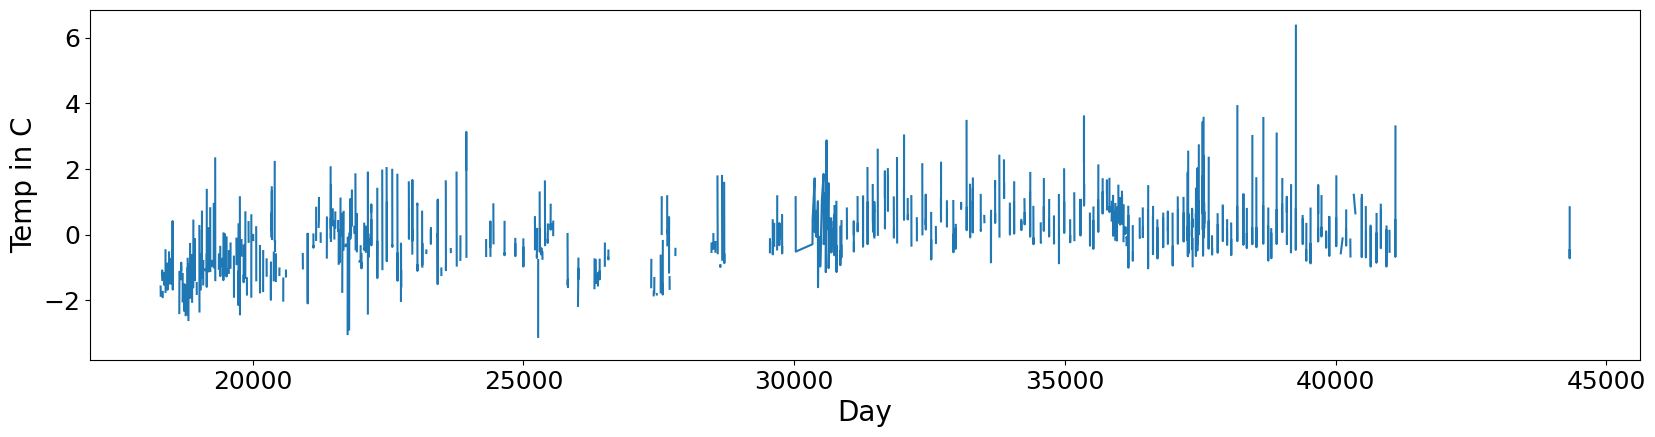

In [116]:
# plot the data over time
saveIt = 0

plt.figure(figsize = (20,10))

plt.subplot(211)
plt.plot(filtered_data)
plt.ylabel('Temp in C', fontsize = 20)
plt.xlabel('Day', fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

In [124]:
# drop nas
filtered_data = filtered_data.dropna(subset=['090.0'])
filtered_data

Sta_ID,090.0
Julian_Date,
18299.0,-1.579468
18300.0,-1.615067
18301.0,-1.859585
18327.0,-1.251310
18328.0,-1.087857
...,...
41106.0,-0.230373
41107.0,3.295316
44323.0,-0.472259


In [125]:
#prep for SSA

L = 30
n_obs = np.shape(filtered_data)[0] - L + 1
SSA_input = np.empty((n_obs, L))

for kk in range(n_obs):
    SSA_input[kk,:] = filtered_data['090.0'].values[kk:kk+L]

filtered_data['090.0'].values[kk:kk+L]

array([ 0.83941577, -0.36180909, -0.6933839 ,  0.08976294,  0.27091985,
       -0.57333759, -0.97155256,  0.21722164,  0.03091058, -0.85501431,
       -0.55688615,  0.63036108,  0.91265252, -0.40984367,  0.18779799,
        0.73820193,  0.12329492, -0.97109828, -0.66248425,  0.24675621,
        0.11687796, -0.3926824 , -0.52312424,  0.44635913, -0.67713493,
       -0.23037264,  3.29531559, -0.4722591 , -0.71839686,  0.83467795])

In [126]:
#do SSA (PCA on the lagged matrix)
n_modes = np.min(np.shape(SSA_input))
pca = PCA(n_components = n_modes)
PCs = pca.fit_transform(SSA_input)
eigvecs = pca.components_
fracVar = pca.explained_variance_ratio_

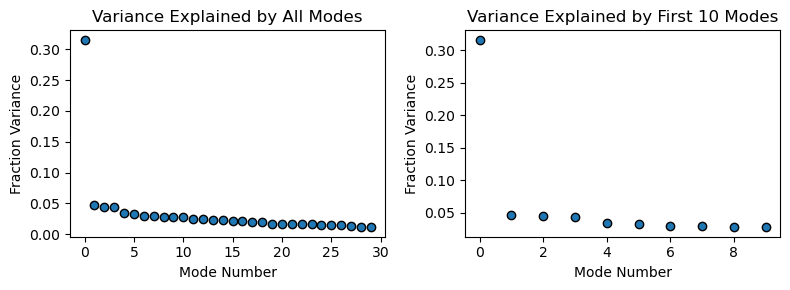

In [127]:
#plot fraction of variance explained by each mode

fig, ax = plt.subplots(1, 2, figsize=(8, 3))

ax[0].scatter(range(len(fracVar)),fracVar, edgecolor = 'k')
ax[0].set_xlabel('Mode Number')
ax[0].set_ylabel('Fraction Variance')
ax[0].set_title('Variance Explained by All Modes')

n_modes_show = 10
ax[1].scatter(range(n_modes_show),fracVar[:n_modes_show], edgecolor = 'k')
ax[1].set_xlabel('Mode Number')
ax[1].set_ylabel('Fraction Variance')
ax[1].set_title('Variance Explained by First ' + str(n_modes_show) + ' Modes')

plt.tight_layout()

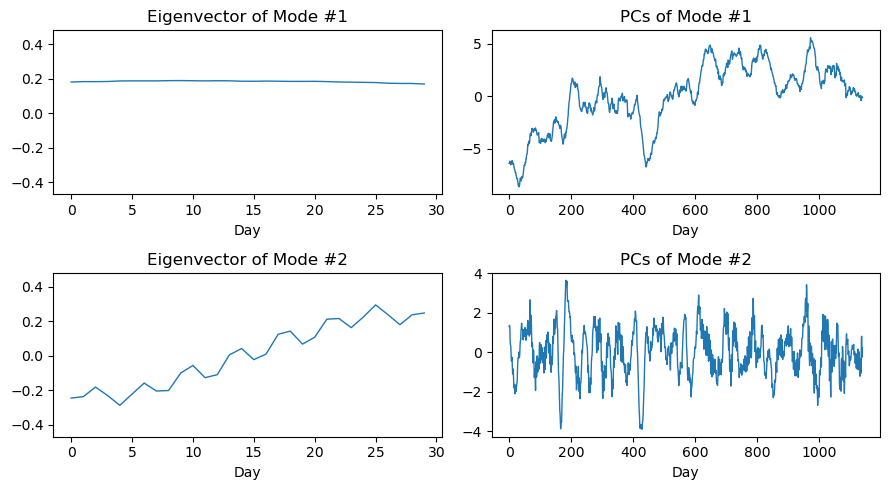

In [129]:
#plot the first n modes and PCs -- choose a value of 'n' from the variance explained figure!
n = 2
fig, ax = plt.subplots(n, 2, figsize=(9, 2.5*n))

for kk in range(n):
    ax[kk, 0].plot(eigvecs[kk], lw=1)
    ax[kk, 0].set_ylim((np.min(eigvecs),np.max(eigvecs)))
    ax[kk, 0].set_xlabel('Day')
    ax[kk, 0].set_title('Eigenvector of Mode #'+str(kk+1))

    ax[kk, 1].plot(PCs[:,kk], lw=1)
    ax[kk, 1].set_title('PCs of Mode #' + str(kk+1))
    ax[kk, 1].set_xlabel('Day')

plt.tight_layout()

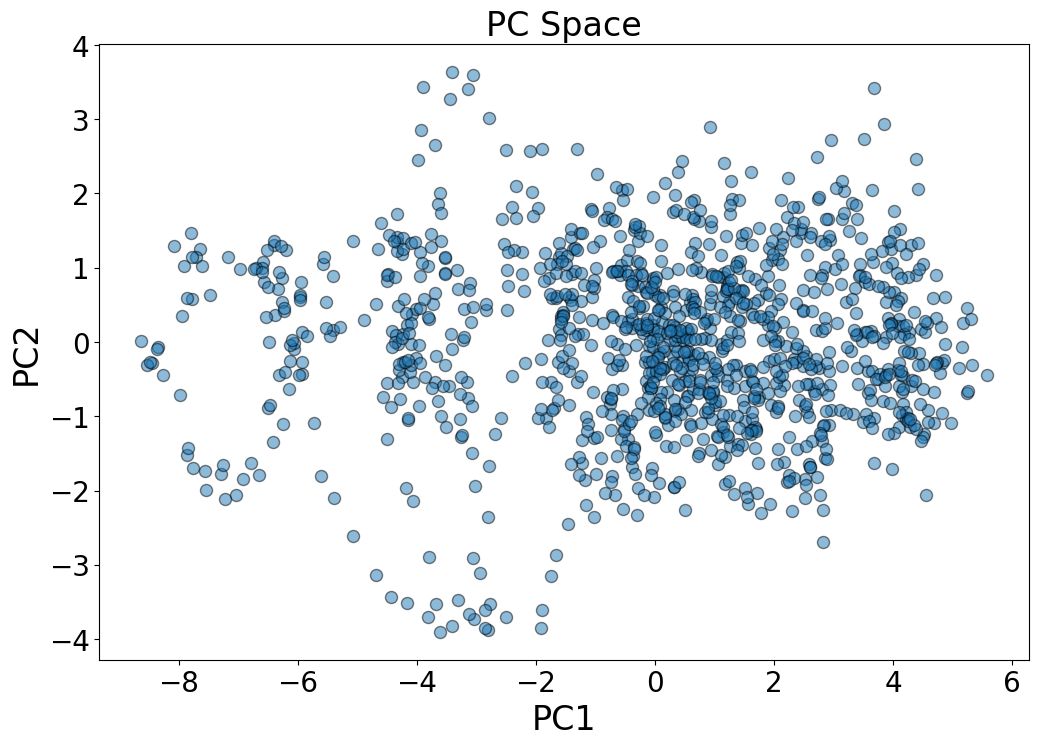

In [130]:
#visualize PC-space

saveIt = 1

plt.figure(figsize = (12,8))

plt.scatter(PCs[:,0],PCs[:,1], s = 75, alpha = 0.5, edgecolor = 'k')
plt.ylabel('PC2', fontsize = 24)
plt.xlabel('PC1', fontsize = 24)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('PC Space', fontsize = 24)

if saveIt:
    plt.savefig('tutorial6_fig5.png')

## Chlorophyll A

In [131]:
# read in the data
data = pd.read_csv('Datasets/calcofi_combined.csv')
data

,Cst_Cnt,Sta_ID,ChlorA,Phaeop,T_degC,Salnty,O2ml_L,PO4uM,SiO3uM,NO3uM,...,Month,Julian_Day,Lat_Dec,Lon_Dec,Julian_Date,Wind_Spd,Wave_Ht,Dry_T,Wave_Prd,Barometer
0,18832,133.0 035.0,0.650000,0.425000,13.172667,34.336533,2.785000,NaN,NaN,14.103333,...,3,67,25.850000,-113.500000,26731.0,12.0,3.0,19.0,6.0,1001.6
1,18833,142.7 008.0,2.483333,1.103333,16.316316,34.930211,2.298421,NaN,27.489474,NaN,...,3,69,25.026666,-110.750000,26733.0,7.0,NaN,19.2,NaN,1001.7
2,18834,142.0 008.0,0.240000,3.330000,14.762400,34.833250,2.067200,NaN,NaN,NaN,...,3,69,25.093333,-110.783333,26733.0,4.0,1.0,20.6,3.0,1001.7
3,18835,120.0 010.0,2.425000,2.483000,15.270000,NaN,3.535000,1.812000,31.675000,NaN,...,3,70,28.856666,-113.258333,26734.0,15.0,1.0,18.8,1.0,1001.0
4,18836,120.0 009.0,5.540909,2.557273,14.281923,NaN,2.874615,NaN,NaN,NaN,...,3,71,28.878333,-113.191666,26735.0,10.0,1.0,18.9,2.0,1000.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13929,35640,093.3 060.0,0.441000,0.272333,10.189478,26.013475,3.393522,1.753478,27.994783,21.642174,...,5,125,31.846300,-119.565900,44321.0,3.0,2.0,14.2,8.0,1015.8
13930,35641,093.3 070.0,0.296533,0.130800,10.864045,25.739976,3.831318,1.485909,23.364091,17.431364,...,5,126,31.515130,-120.240520,44322.0,7.0,NaN,13.6,NaN,1015.4
13931,35642,093.3 080.0,0.214667,0.107533,10.590261,25.814580,3.374952,1.610000,27.298182,19.575000,...,5,126,31.176820,-120.920900,44322.0,6.0,NaN,12.7,NaN,1016.9
13932,35643,093.3 090.0,0.235235,0.112588,10.446458,25.826096,3.724625,1.532917,26.943333,18.801250,...,5,126,30.846380,-121.589030,44322.0,7.0,3.0,13.1,8.0,1017.6


In [132]:
data['Sta_ID'] = data['Sta_ID'].str.split().str[0]
data

,Cst_Cnt,Sta_ID,ChlorA,Phaeop,T_degC,Salnty,O2ml_L,PO4uM,SiO3uM,NO3uM,...,Month,Julian_Day,Lat_Dec,Lon_Dec,Julian_Date,Wind_Spd,Wave_Ht,Dry_T,Wave_Prd,Barometer
0,18832,133.0,0.650000,0.425000,13.172667,34.336533,2.785000,NaN,NaN,14.103333,...,3,67,25.850000,-113.500000,26731.0,12.0,3.0,19.0,6.0,1001.6
1,18833,142.7,2.483333,1.103333,16.316316,34.930211,2.298421,NaN,27.489474,NaN,...,3,69,25.026666,-110.750000,26733.0,7.0,NaN,19.2,NaN,1001.7
2,18834,142.0,0.240000,3.330000,14.762400,34.833250,2.067200,NaN,NaN,NaN,...,3,69,25.093333,-110.783333,26733.0,4.0,1.0,20.6,3.0,1001.7
3,18835,120.0,2.425000,2.483000,15.270000,NaN,3.535000,1.812000,31.675000,NaN,...,3,70,28.856666,-113.258333,26734.0,15.0,1.0,18.8,1.0,1001.0
4,18836,120.0,5.540909,2.557273,14.281923,NaN,2.874615,NaN,NaN,NaN,...,3,71,28.878333,-113.191666,26735.0,10.0,1.0,18.9,2.0,1000.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13929,35640,093.3,0.441000,0.272333,10.189478,26.013475,3.393522,1.753478,27.994783,21.642174,...,5,125,31.846300,-119.565900,44321.0,3.0,2.0,14.2,8.0,1015.8
13930,35641,093.3,0.296533,0.130800,10.864045,25.739976,3.831318,1.485909,23.364091,17.431364,...,5,126,31.515130,-120.240520,44322.0,7.0,NaN,13.6,NaN,1015.4
13931,35642,093.3,0.214667,0.107533,10.590261,25.814580,3.374952,1.610000,27.298182,19.575000,...,5,126,31.176820,-120.920900,44322.0,6.0,NaN,12.7,NaN,1016.9
13932,35643,093.3,0.235235,0.112588,10.446458,25.826096,3.724625,1.532917,26.943333,18.801250,...,5,126,30.846380,-121.589030,44322.0,7.0,3.0,13.1,8.0,1017.6


In [133]:
# sort the data
data_sorted = data.sort_values(by=['Julian_Date'], ascending = True)

# Check the sorted data
data_sorted[['Sta_ID', 'Julian_Date', 'ChlorA']]

,Sta_ID,Julian_Date,ChlorA
0,133.0,26731.0,0.650000
1,142.7,26733.0,2.483333
2,142.0,26733.0,0.240000
3,120.0,26734.0,2.425000
10,117.0,26735.0,6.092727
...,...,...,...
13900,083.3,44329.0,1.018909
13899,083.3,44329.0,0.599818
13897,081.8,44329.0,0.931000
13890,080.0,44329.0,3.092000


In [134]:
# data_chla = data_sorted.pivot_table(index='Julian_Date', columns='Sta_ID', values='ChlorA')
data_chla = data_sorted.pivot_table(index='Julian_Date', columns='Sta_ID', values='ChlorA')
data_chla.head()

Sta_ID,044.0,046.0,046.7,047.0,047.5,047.7,048.0,048.5,048.7,049.0,...,123.3,126.7,130.0,132.0,133.0,133.3,136.7,142.0,142.7,149.0
Julian_Date,,,,,,,,,,,,,,,,,,,,,
26731.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.65,NaN,NaN,NaN,NaN,NaN
26733.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.24,2.483333,NaN
26734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26735.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26737.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
# Filter columns that have more than 150 non-null values
filtered_data = data_chla.loc[:, data_chla.notnull().sum(axis=0) > 620]
filtered_data

Sta_ID,090.0
Julian_Date,
26731.0,NaN
26733.0,NaN
26734.0,NaN
26735.0,NaN
26737.0,NaN
...,...
44325.0,1.646631
44326.0,NaN
44327.0,NaN


In [146]:
# normalize the data
filtered_data = (filtered_data - np.mean(filtered_data))/np.std(filtered_data)
filtered_data.head()

/Users/andreajackman/miniconda3/envs/eosc410/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Sta_ID,090.0
Julian_Date,
26731.0,NaN
26733.0,NaN
26734.0,NaN
26735.0,NaN
26737.0,NaN


(array([-2.,  0.,  2.,  4.,  6.,  8., 10.]),
 [Text(0, -2.0, '−2'),
  Text(0, 0.0, '0'),
  Text(0, 2.0, '2'),
  Text(0, 4.0, '4'),
  Text(0, 6.0, '6'),
  Text(0, 8.0, '8'),
  Text(0, 10.0, '10')])

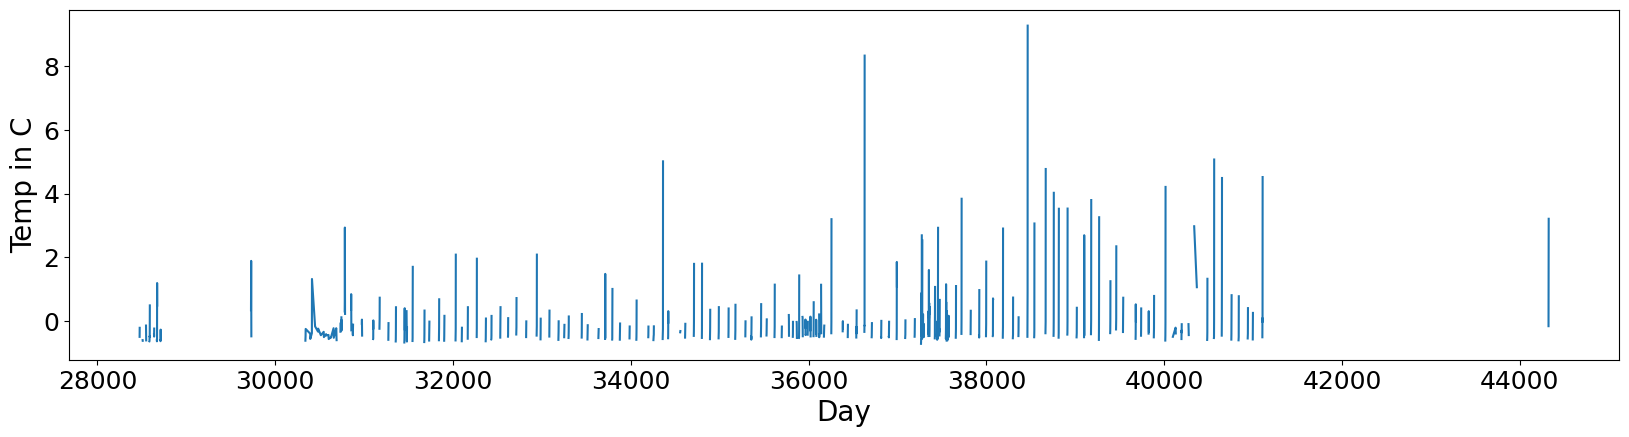

In [147]:
# plot the data over time
saveIt = 0

plt.figure(figsize = (20,10))

plt.subplot(211)
plt.plot(filtered_data)
plt.ylabel('Temp in C', fontsize = 20)
plt.xlabel('Day', fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

In [148]:
# drop nas
filtered_data = filtered_data.dropna(subset=['090.0'])
filtered_data

Sta_ID,090.0
Julian_Date,
28474.0,-0.502555
28475.0,-0.218121
28508.0,-0.604194
28509.0,-0.626256
28546.0,-0.147471
...,...
41106.0,-0.038363
41107.0,4.517440
44323.0,-0.167315


In [149]:
#prep for SSA

L = 30
n_obs = np.shape(filtered_data)[0] - L + 1
SSA_input = np.empty((n_obs, L))

for kk in range(n_obs):
    SSA_input[kk,:] = filtered_data['090.0'].values[kk:kk+L]

filtered_data['090.0'].values[kk:kk+L]

array([-0.5390766 , -0.51065838,  0.03561503,  5.06807239, -0.46406367,
        0.05311513,  1.25222005,  4.48733652, -0.5890081 , -0.41076059,
        0.38903914,  0.80624737, -0.61120153, -0.56330135, -0.50668931,
        0.77291142, -0.55286494, -0.45213776, -0.40435815,  0.39997157,
       -0.58400016, -0.25213961,  0.24969176, -0.51577592,  0.08908303,
       -0.03836313,  4.51743956, -0.16731501,  1.09350264,  3.20651733])

In [150]:
#do SSA (PCA on the lagged matrix)
n_modes = np.min(np.shape(SSA_input))
pca = PCA(n_components = n_modes)
PCs = pca.fit_transform(SSA_input)
eigvecs = pca.components_
fracVar = pca.explained_variance_ratio_

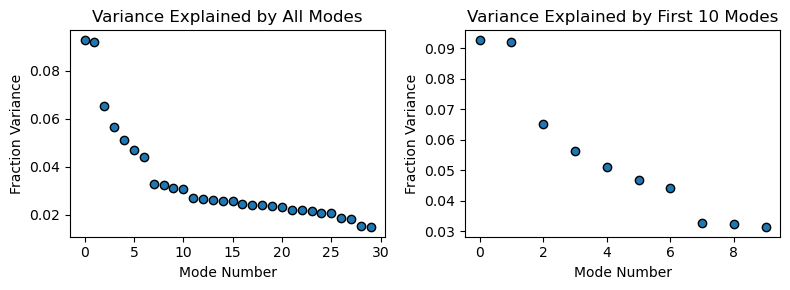

In [151]:
#plot fraction of variance explained by each mode

fig, ax = plt.subplots(1, 2, figsize=(8, 3))

ax[0].scatter(range(len(fracVar)),fracVar, edgecolor = 'k')
ax[0].set_xlabel('Mode Number')
ax[0].set_ylabel('Fraction Variance')
ax[0].set_title('Variance Explained by All Modes')

n_modes_show = 10
ax[1].scatter(range(n_modes_show),fracVar[:n_modes_show], edgecolor = 'k')
ax[1].set_xlabel('Mode Number')
ax[1].set_ylabel('Fraction Variance')
ax[1].set_title('Variance Explained by First ' + str(n_modes_show) + ' Modes')

plt.tight_layout()

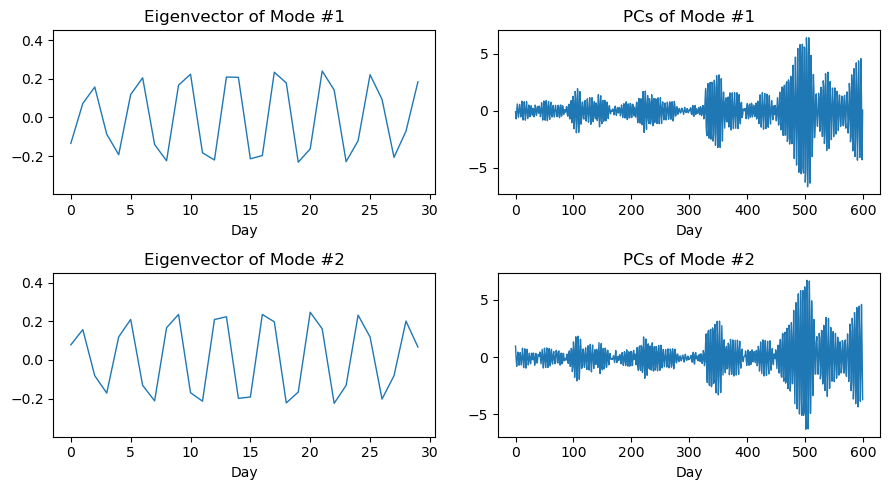

In [152]:
#plot the first n modes and PCs -- choose a value of 'n' from the variance explained figure!
n = 2
fig, ax = plt.subplots(n, 2, figsize=(9, 2.5*n))

for kk in range(n):
    ax[kk, 0].plot(eigvecs[kk], lw=1)
    ax[kk, 0].set_ylim((np.min(eigvecs),np.max(eigvecs)))
    ax[kk, 0].set_xlabel('Day')
    ax[kk, 0].set_title('Eigenvector of Mode #'+str(kk+1))

    ax[kk, 1].plot(PCs[:,kk], lw=1)
    ax[kk, 1].set_title('PCs of Mode #' + str(kk+1))
    ax[kk, 1].set_xlabel('Day')

plt.tight_layout()

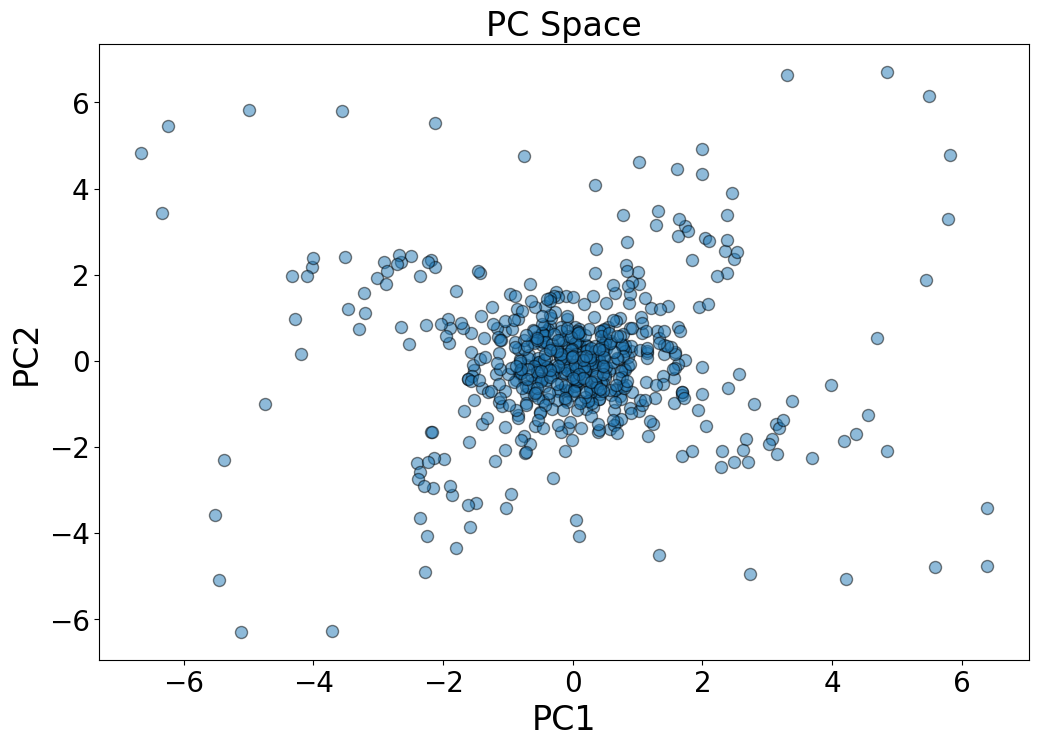

In [153]:
#visualize PC-space

saveIt = 1

plt.figure(figsize = (12,8))

plt.scatter(PCs[:,0],PCs[:,1], s = 75, alpha = 0.5, edgecolor = 'k')
plt.ylabel('PC2', fontsize = 24)
plt.xlabel('PC1', fontsize = 24)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('PC Space', fontsize = 24)

if saveIt:
    plt.savefig('tutorial6_fig5.png')